# Assignment 2

Please read the following instructions carefully:

This assignment will test your knowledge of machine learning, data visualisation, and computer vision techniques in Python. This will primarily focus on scikit-learn, seaborn/matplotlib and skimage/opencv, and how to program using these packages and as such you should use the appropriate functionality provided by the packages. You may also use Numpy, panda, etc. where appropriate for some questions. Do not use any other external packages other than these.

In the below questions you will generally need to complete the code in the cell below the question and output the required results, charts or graphs. 

Questions 1-5 are each worth 5 marks.

#### 1. Load/download and normalize the FashionMNIST training and test datasets using the instructions shown here: https://github.com/zalandoresearch/fashion-mnist#usage.
#### Please download both the training and testing sets, and load the training images, training labels, testing images, and testing labels as 'x_train', 'y_train', 'x_test', and 'y_test, correspondingly.
    
#### And show some training images by visualising a few images from the training set.

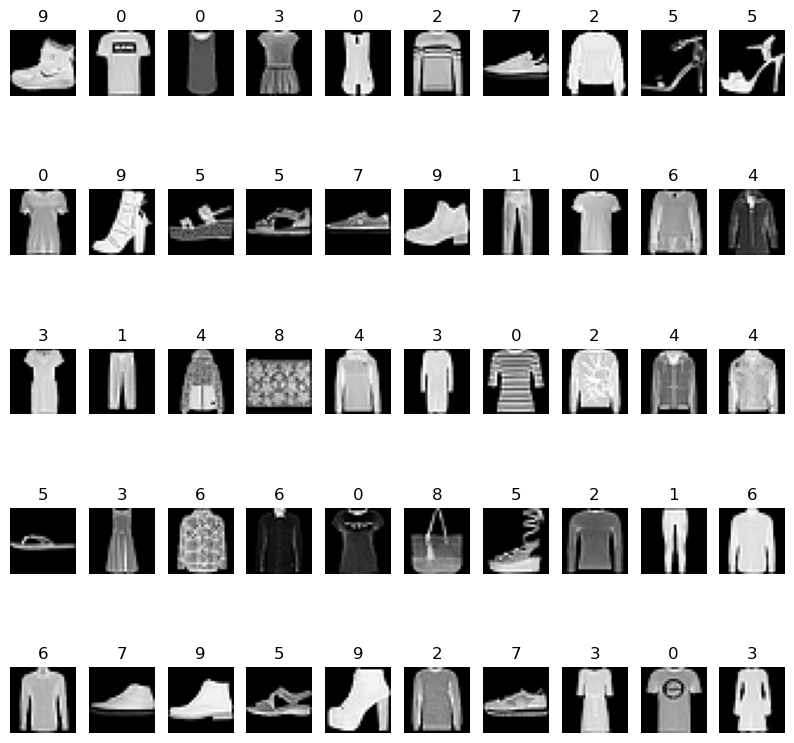

In [50]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

#load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#Normalizing the datasets
x_train = x_train / 255.0
x_test = x_test / 255.0

# some examples of training images
plt.figure(figsize=(10, 10))
for i in range(50):
    plt.subplot(5, 10, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

#### 2. Please show 5 images from the training set in a row (similar to what you have done above), but this time also show the corresponding category name (e.g. T-shirt, Dress, Bag, etc., detailed definition of the categories is list on the dataset link above) on top of each image as its title.



In [51]:
#introducing labels on the images and then showing 5 examples
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

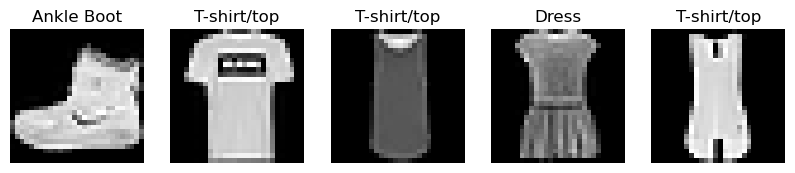

In [52]:
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(labels[y_train[i]])
    plt.axis('off')
plt.show()

#### 3. Apply a support vector classifier on the above (training) data. And use the learned/trained classifier to predict the category value on the test set.
#### The parameters to be used in the SVM classifier are: linear kernel, regularization of 0.025, and all others by default.

#### If you find the training over the whole training set takes too much time (e.g. > 10 minutes), you may only use the first 10,000 samples of the training set instead.

#### Please also show 5 examples from the test set, with the title being "predicted category name (ground-truth category name)", e.g. "Shirt (Shirt)".

In [53]:
from sklearn.svm import SVC  # Importing Support Vector Classifier

# Creating and training the support vector classifier
svm_classifier = SVC(kernel='linear', C=0.025)
#using the first 10,000 samples
svm_classifier.fit(x_train[:10000].reshape(10000,-1), y_train[:10000])
#predicting
svm_y_pred = svm_classifier.predict(x_test.reshape(len(x_test),-1))
# Calculate the accuracy of the classifier
from sklearn.metrics import accuracy_score  # Importing the accuracy_score function
accuracy = accuracy_score(y_test, svm_y_pred)
print('Accuracy of the SVM classifier:',accuracy*100,'%')

Accuracy of the SVM classifier: 83.87 %


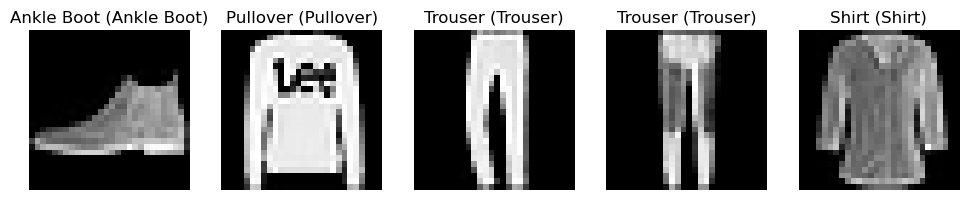

In [54]:
#examples
plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"{labels[svm_y_pred[i]]} ({labels[y_test[i]]})")
    plt.axis('off')
plt.show()

In [55]:
# SVC classification report
from sklearn.metrics import classification_report  #importing library
print(" SVC Classification Report for 10000 samples:")
print(classification_report(y_test,svm_y_pred))

 SVC Classification Report for 10000 samples:
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.99      0.95      0.97      1000
           2       0.73      0.74      0.73      1000
           3       0.84      0.88      0.86      1000
           4       0.74      0.76      0.75      1000
           5       0.93      0.91      0.92      1000
           6       0.61      0.56      0.58      1000
           7       0.89      0.92      0.90      1000
           8       0.94      0.95      0.94      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



#### 4. Similar to above, but use a neural network (i.e. MLP classifier) for the classification task, and training it for 1000 maximum numebr of iterations, with the L2 penalty of 1.
#### First use the same 10,000 training samples, then change the number of training samples to the whole training set. Think about the difference between this classifier and the above SVM classifier.

#### Please also show 5 samples from the test set (same as above), and also print the text report of the main classification metrics. Think about how does it differ from the results in the above SVM classification model (i.e. you need to print out the classification metrics for the above SVM model to compare).

In [56]:
from sklearn.neural_network import MLPClassifier

# Using first 10,000 training samples
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(x_train[:10000].reshape(10000,-1), y_train[:10000])
# Predicting 
mlp_y_pred = mlp.predict(x_test.reshape(len(x_test),-1))
# Using the entire training set
mlp_full = MLPClassifier(alpha=1, max_iter=1000)
mlp_full.fit(x_train.reshape(len(x_train),-1), y_train)
# Predicting
mlpFull_y_pred = mlp_full.predict(x_test.reshape(len(x_test),-1))
#accuracy percentage
accuracy_10000 = accuracy_score(y_test, mlp_y_pred)
print('Accuracy for 10000 samples:',accuracy_10000*100 ,'%')

accuracy_full = accuracy_score(y_test, mlpFull_y_pred)
print('Accuracy for entire data set:',accuracy_full*100,'%')

Accuracy for 10000 samples: 84.16 %
Accuracy for entire data set: 85.07000000000001 %


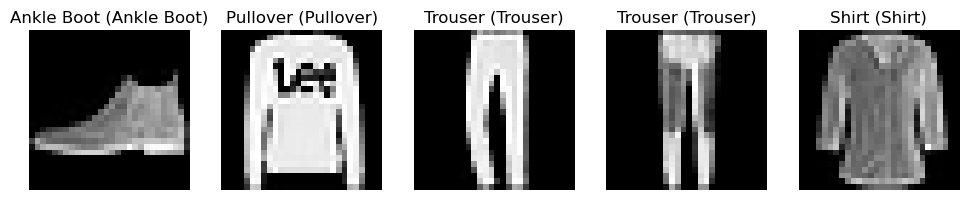

In [57]:
#Examples
plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"{labels[mlpFull_y_pred[i]]} ({labels[y_test[i]]})")
    plt.axis('off')
plt.show()

In [58]:
# Print the classification reports
print("MLP Classification Report using 10000 samples:")
print(classification_report(y_test, mlp_y_pred))

print("MLP Classification Report using entire dataset:")
print(classification_report(y_test, mlpFull_y_pred))

MLP Classification Report using 10000 samples:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.98      0.96      0.97      1000
           2       0.67      0.85      0.75      1000
           3       0.85      0.87      0.86      1000
           4       0.82      0.60      0.70      1000
           5       0.92      0.93      0.92      1000
           6       0.63      0.60      0.61      1000
           7       0.90      0.93      0.91      1000
           8       0.95      0.93      0.94      1000
           9       0.94      0.92      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

MLP Classification Report using entire dataset:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      1000
           1       0.99      0.95    

#### 5. Please apply a Sobel edge detector on the above dataset images (both training and testing), then train the same MLP classifier as above (on the whole new trianing set), show the prediction results of 5 samples from the (new) test set, with the "prediction (ground-truth label)" as title for each sample, and also reprot the main classification matrics. 

#### Similarly, apply a bilateral filter (neighborhood diameter 9 and both sigma for color and space set to 85) to the original dataset images (both training and testing), then train the same MLP classifier, show the prediction, and the metrics, same as above. Compare the difference between the original-image-based classification, edge-based classification, and this filtered-image-based classification.

In [69]:
from skimage import filters
# Applying the Sobel filter
x_train_sobel = np.array([filters.sobel(img.reshape((28,28))) for img in x_train])
x_test_sobel = np.array([filters.sobel(img.reshape((28,28))) for img in x_test])

In [70]:
# Training  the MLP classifier
mlp = MLPClassifier(max_iter=1000, alpha=1)
mlp.fit(x_train_sobel.reshape(len(x_train_sobel),-1), y_train)
# Predicting
y_pred = mlp.predict(x_test_sobel.reshape(len(x_test_sobel),-1))
#accuracy percentage
accuracy_sobel = accuracy_score(y_test, y_pred)
print('Accuracy for Sobel Edge:',accuracy_sobel*100 ,'%')

Accuracy for Sobel Edge: 84.13000000000001 %


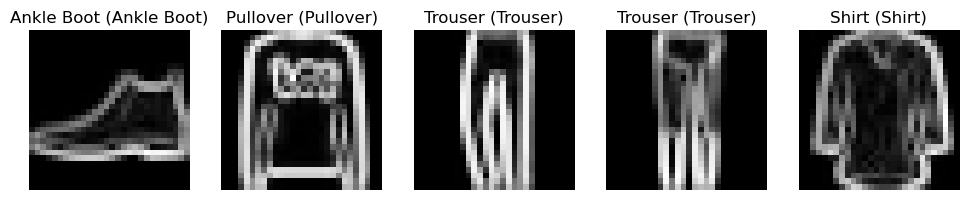

In [71]:
#displaying 5 images 
plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_sobel[i].reshape(28,28),cmap='gray')
    plt.title(f"{labels[y_pred[i]]} ({labels[y_test[i]]})")
    plt.axis('off')
plt.show()

In [72]:
# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1000
           1       0.97      0.94      0.96      1000
           2       0.78      0.75      0.76      1000
           3       0.81      0.88      0.84      1000
           4       0.78      0.74      0.76      1000
           5       0.89      0.94      0.91      1000
           6       0.61      0.64      0.62      1000
           7       0.92      0.86      0.89      1000
           8       0.92      0.95      0.94      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [36]:
pip install opencv-python

In [62]:
import cv2 #importing CV

In [63]:
# defining bilateral filter 
def apply_bilateral_filter(images):
    images=(images*255).astype(np.uint8)   
    filtered_images = np.array([cv2.bilateralFilter(img, 9, 85, 85) for img in images])
    return filtered_images

# Applying the filter
x_train_filtered = apply_bilateral_filter(x_train)
x_test_filtered = apply_bilateral_filter(x_test)

In [65]:
# Training  the MLP classifier
mlp = MLPClassifier(alpha=1, max_iter=1000)
mlp.fit(x_train_filtered.reshape(len(x_train_filtered),-1), y_train)

# Predicting
y_pred = mlp.predict(x_test_filtered.reshape(len(x_test_filtered),-1))

#Accuracy percentage
accuracy_bilateral = accuracy_score(y_test, y_pred)
print('Accuracy for Bilateral:',accuracy_bilateral*100 ,'%')

Accuracy for Bilateral: 83.41 %


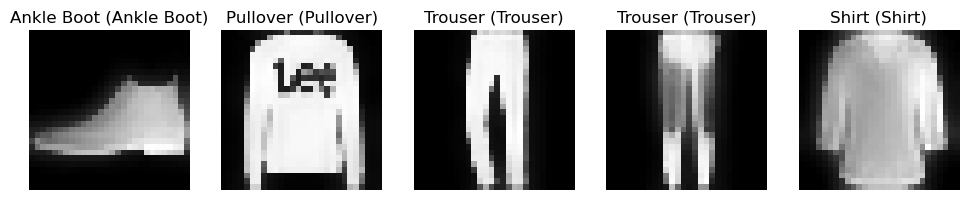

In [66]:
plt.figure(figsize=(12, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test_filtered[i].reshape(28, 28), cmap='gray')
    plt.title(f"{labels[y_pred[i]]} ({labels[y_test[i]]})")
    plt.axis('off')
plt.show()

In [67]:
#Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      1000
           1       0.98      0.95      0.97      1000
           2       0.75      0.71      0.73      1000
           3       0.87      0.80      0.84      1000
           4       0.64      0.89      0.74      1000
           5       0.91      0.93      0.92      1000
           6       0.62      0.46      0.53      1000
           7       0.91      0.94      0.93      1000
           8       0.95      0.96      0.96      1000
           9       0.96      0.90      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000

